In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
dataf = pd.read_csv("loan.csv")
dataf.head()

C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_4552\3843155979.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  dataf = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
dataf.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
dataf.shape

(39717, 111)

In [6]:
dataf['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [7]:
# dropping the customers who loan is currently running
dataf = dataf[dataf['loan_status']!="Current"]

In [8]:
dataf['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [9]:
data_len = len(dataf)
data_len
(dataf.isnull().sum()/data_len) * 100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [10]:
# checking for duplicated rows
len(dataf[dataf.duplicated()])

0

In [11]:
# calculating the percentage of null value in each column
(dataf.isnull().sum()/ data_len) * 100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [12]:
# finding the no. of columns that has null values completyly
print('No of null cols', len(dataf.columns[dataf.isnull().any()]))
nul_cols = dataf.columns[dataf.isna().all()].tolist()
nul_cols

No of null cols 68


['next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_

In [13]:
# drop  the columns that has all the values as null
dataf = dataf.dropna(axis = 1, how="all")

In [14]:
dataf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
dataf.shape

(38577, 56)

In [16]:
#  unique columns were all the values are unqique
u_col =  [ i for i in dataf.columns if dataf[i].nunique() == data_len]
u_col

['id', 'member_id', 'url']

In [17]:
#  dropping the unique columns that is not necessary

dataf.drop(['url', 'member_id'], axis = 1, inplace = True)

In [18]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [19]:
# This column has a description data
dataf.drop(['title', 'desc'], axis = 1, inplace =  True)

In [20]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [21]:
dataf.shape

(38577, 52)

In [22]:
# we can also work on the grade column so dropping sub grade

dataf.drop(['sub_grade'], inplace=True, axis =1 )

In [23]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [24]:
# irrelevant columns 

un_col = ['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

In [25]:
dataf.drop(un_col, inplace=True, axis=1)

In [26]:
dataf.shape

(38577, 30)

In [27]:
dataf.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [28]:
# dropping the columns that has a single value type means only single value count

for i in dataf.columns:
    if dataf[i].nunique(dropna=True) == 1:
        print(i)
        dataf = dataf.drop(i, axis = 1)
dataf        


pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,...,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,NaN,NaN,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,...,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,NaN,NaN,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,...,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,NaN,NaN,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,...,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,35.0,NaN,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,...,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,...,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,0.0,0.0,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,...,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,5.0,0.0,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,0.0,0.0,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,...,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,0.0,0.0,NaN


In [29]:
dataf.shape

(38577, 22)

In [30]:
dat_len = len(dataf)
round(dataf.isna().sum()/dat_len*100, 2)

id                         0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
emp_title                  6.19
emp_length                 2.68
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
mths_since_last_delinq    64.56
mths_since_last_record    92.90
pub_rec_bankruptcies       1.81
dtype: float64

In [31]:
# dropping the columns that has more than 50% null values

for i in dataf.columns:
    if round(dataf[i].isna().sum()/dat_len * 100, 2) >=50.00:
        dataf = dataf.drop(i, axis=1)
dataf        

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,802xx,CO,11.33,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,274xx,NC,6.40,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,017xx,MA,2.30,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,208xx,MD,3.72,NaN


In [32]:
dataf.shape

(38577, 20)

In [33]:
dataf = dataf.drop('emp_title', axis=1)

In [34]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [35]:
dataf.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [36]:
dataf.term.value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [37]:
# function to remove the months str from the column
def clean_t(n):
    return int(n.strip().split()[0])
    

In [38]:
dataf.shape

(38577, 19)

In [39]:
dataf["term"] = dataf["term"].apply(clean_t)

In [40]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [41]:
# removing % from the intrest rate column

dataf['int_rate'] = dataf['int_rate'].apply(lambda x: float(x[:-1]) if x[-1]=='%' else float(x) )

In [42]:
dataf.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [43]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [44]:
# converting the issue  date column from object to date time 

dataf["issue_d"] = pd.to_datetime(dataf.issue_d, format="%b-%y")
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [45]:
dataf['issue_d'].value_counts()

issue_d
2011-11-01    2062
2011-12-01    2042
2011-10-01    1941
2011-09-01    1913
2011-08-01    1798
2011-07-01    1745
2011-06-01    1728
2011-05-01    1609
2011-04-01    1559
2011-03-01    1442
2011-01-01    1380
2011-02-01    1297
2010-12-01    1267
2010-10-01    1132
2010-11-01    1121
2010-07-01    1119
2010-09-01    1086
2010-08-01    1078
2010-06-01    1029
2010-05-01     920
2010-04-01     827
2010-03-01     737
2010-02-01     627
2009-11-01     602
2009-12-01     598
2010-01-01     589
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     171
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2007-08-01      33
2008-09-01      32
2007

In [46]:
ttl_len = len(dataf)
(dataf.isnull().sum() * 100 )/ttl_len 

id                      0.000000
loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [47]:
dataf.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [48]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [49]:
# dropping the employee having null 

dataf = dataf[dataf['emp_length'].notna()]


In [50]:
dataf = dataf[dataf["pub_rec_bankruptcies"].notna()]

In [51]:
dataf.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [52]:
dataf.shape

(36847, 19)

In [53]:
dataf['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39562       1 year
39573      3 years
39623      8 years
39666      2 years
39680      2 years
Name: emp_length, Length: 36847, dtype: object

In [54]:
# removing the irrelevant characters from the column

def emp_l_strip(m):
    m = m.strip("years")
    m=m.strip("year")
    m=m.strip("<")
    m=m.replace("+", '')
    m=m.replace(" ", '')
    return m

dataf["emp_length"] = dataf["emp_length"].apply(emp_l_strip)


In [55]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0


In [56]:
dataf.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
dtype: object

In [57]:
# changing the data type

dataf['emp_length'] = dataf["emp_length"].astype(int)

In [58]:
dataf.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
emp_length                       int32
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
dtype: object

In [59]:
dataf.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [60]:
# extracting the year and month from the issue date column

dataf['issue_y'] = pd.DatetimeIndex(dataf['issue_d']).year

In [61]:
dataf['issue_m'] = pd.DatetimeIndex(dataf['issue_d']).month

In [62]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_y,issue_m
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,...,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011,12
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,1,RENT,...,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,2011,12
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,...,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,2011,12
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,...,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,2011,12
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3,RENT,...,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,2011,12


In [63]:
dataf.shape

(36847, 21)

In [64]:
dataf.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_y', 'issue_m'],
      dtype='object')

In [65]:
dataf[['funded_amnt','funded_amnt_inv', 'issue_m']]

,funded_amnt,funded_amnt_inv,issue_m
0,5000,4975.0,12
1,2500,2500.0,12
2,2400,2400.0,12
3,10000,10000.0,12
5,5000,5000.0,12
...,...,...,...
39562,4800,1100.0,11
39573,7000,1000.0,11
39623,9000,700.0,10
39666,15450,600.0,8


{'whiskers': [<matplotlib.lines.Line2D at 0x1b5413a81a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5413a9250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5413a9550>],
 'medians': [<matplotlib.lines.Line2D at 0x1b53c636630>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b53c6359a0>],
 'means': []}

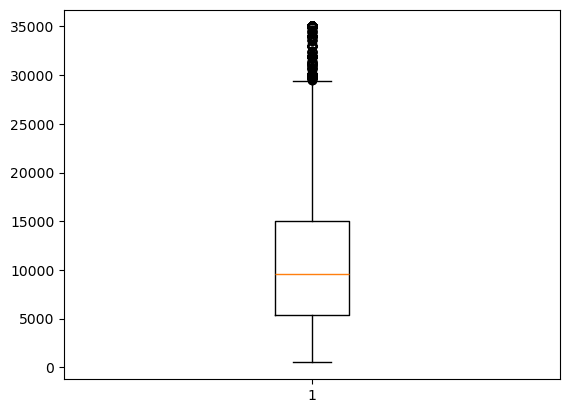

In [141]:
plt.boxplot(dataf['funded_amnt'])

In [67]:
dataf['funded_amnt'].describe()

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5459df800>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5459dfef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5459df590>],
 'medians': [<matplotlib.lines.Line2D at 0x1b545a201a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b545a203e0>],
 'means': []}

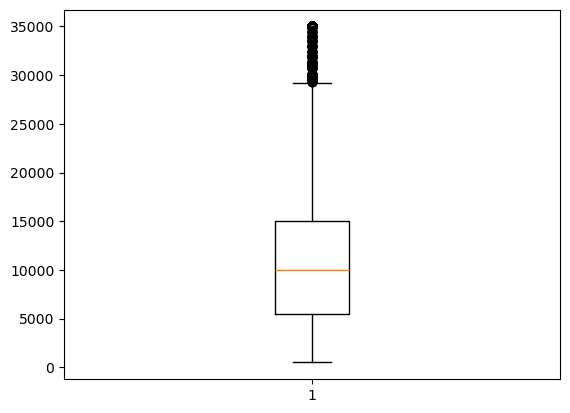

In [145]:
plt.boxplot(dataf["loan_amnt"])

In [229]:
# Univariante analysis

# bucket loan amount

def loan_bucket_list(n):
    if n <= 5000:
        return "5K and below" # 25 Q
    elif n> 5000 and n<= 10000:
        return "5 - 10K"
    elif n>10000 and n<= 15000:
        return "10 - 15K"
    else:
        return "above 15K"  # 75Q

dataf['loan_bucket'] =  dataf['loan_amnt'].apply(loan_bucket_list)

In [161]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_y,issue_m,loan_buck,loan_bucket
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,...,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011,12,5K and below,5K and below
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,1,RENT,...,Charged Off,car,309xx,GA,1.00,0.0,2011,12,5K and below,5K and below
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,...,Fully Paid,small_business,606xx,IL,8.72,0.0,2011,12,5K and below,5K and below
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,...,Fully Paid,other,917xx,CA,20.00,0.0,2011,12,between 5 and 10K,between 5 and 10K
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3,RENT,...,Fully Paid,wedding,852xx,AZ,11.20,0.0,2011,12,5K and below,5K and below


In [169]:
dataf.drop("loan_buck", axis =1, inplace=True)

In [171]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_y,issue_m,loan_bucket
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,...,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011,12,5K and below
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,1,RENT,...,2011-12-01,Charged Off,car,309xx,GA,1.00,0.0,2011,12,5K and below
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,...,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0.0,2011,12,5K and below
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,...,2011-12-01,Fully Paid,other,917xx,CA,20.00,0.0,2011,12,between 5 and 10K
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3,RENT,...,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0.0,2011,12,5K and below


In [173]:
dataf.shape

(36847, 22)

In [177]:
dataf.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_y', 'issue_m',
       'loan_bucket'],
      dtype='object')

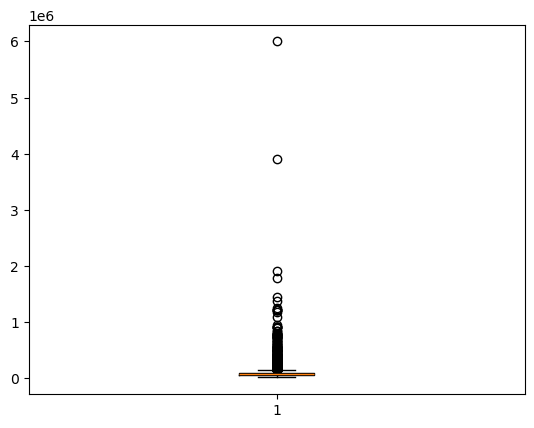

In [185]:
plt.boxplot(dataf['annual_inc'])
plt.show()

In [205]:
dataf["annual_inc"].value_counts().sort_values(ascending=False)
dataf["annual_inc"].max()
#  40k, 40-50k, 50-60k,  60 - 70k, 70-80k, 80k and above



6000000.0

In [209]:
def annual_inc_buck(n):
    if n <= 40000:
        return "40k and below"
    elif n > 40000 and n <= 50000:
        return "40k - 50k"
    elif n >  50000 and n <= 60000:
        return "50 - 60k"
    elif n > 60000 and n <=70000:
        return "60 - 70k"
    elif n > 70000 and n <= 80000:
        return "70 - 80k"
    else: 
        return "80k and above"

dataf['salary_buck'] =  dataf['annual_inc'].apply(annual_inc_buck)


In [211]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,loan_status,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_y,issue_m,loan_bucket,salary_buck
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,...,Fully Paid,credit_card,860xx,AZ,27.65,0.0,2011,12,5K and below,40k and below
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,1,RENT,...,Charged Off,car,309xx,GA,1.00,0.0,2011,12,5K and below,40k and below
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,...,Fully Paid,small_business,606xx,IL,8.72,0.0,2011,12,5K and below,40k and below
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,...,Fully Paid,other,917xx,CA,20.00,0.0,2011,12,between 5 and 10K,40k - 50k
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3,RENT,...,Fully Paid,wedding,852xx,AZ,11.20,0.0,2011,12,5K and below,40k and below


In [217]:
dataf['int_rate'].sort_values()

10145     5.42
9302      5.42
18590     5.42
12558     5.42
12538     5.42
         ...  
6456     23.91
1619     24.11
1799     24.11
5964     24.11
13492    24.40
Name: int_rate, Length: 36847, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b54df11040>,
 'caps': [<matplotlib.lines.Line2D at 0x1b54df135f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b54deaf830>],
 'medians': [<matplotlib.lines.Line2D at 0x1b54df10050>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b54df12ed0>],
 'means': []}

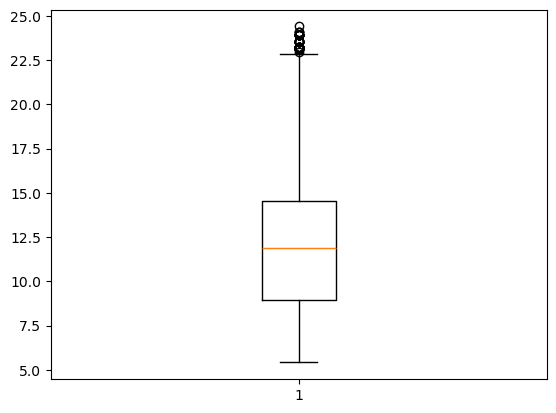

In [219]:
plt.boxplot(dataf['int_rate'])

In [221]:
# Intrest rate bucket

def int_buck(n):
    if n <= 9:
        return "Very Low"
    elif n > 9 and n <= 12: #25 Q
        return "Low"
    elif n>12 and n<=13.5: # 50 Q
        return "Moderate" 
    elif n> 13.5 and n <= 15: 
        return "High"
    else:
        return"Very High" #75 Q 


dataf['int_rate_buck'] = dataf["int_rate"].apply(int_buck)

In [231]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,purpose,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_y,issue_m,salary_buck,int_rate_buck,loan_bucket
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,...,credit_card,860xx,AZ,27.65,0.0,2011,12,40k and below,Low,5K and below
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,1,RENT,...,car,309xx,GA,1.00,0.0,2011,12,40k and below,Very High,5K and below
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,...,small_business,606xx,IL,8.72,0.0,2011,12,40k and below,Very High,5K and below
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,...,other,917xx,CA,20.00,0.0,2011,12,40k - 50k,Moderate,5 - 10K
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3,RENT,...,wedding,852xx,AZ,11.20,0.0,2011,12,40k and below,Very Low,5K and below


In [233]:
dataf.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_y', 'issue_m',
       'salary_buck', 'int_rate_buck', 'loan_bucket'],
      dtype='object')

In [241]:
dataf['dti'].value_counts().sort_values(ascending=False)

dti
0.00     152
12.00     42
18.00     40
19.20     39
13.20     38
        ... 
29.63      1
29.01      1
25.16      1
26.80      1
25.43      1
Name: count, Length: 2848, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b54ec75670>,
 'caps': [<matplotlib.lines.Line2D at 0x1b54ec74e00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b54ec748c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b54ec75e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b54ec74320>],
 'means': []}

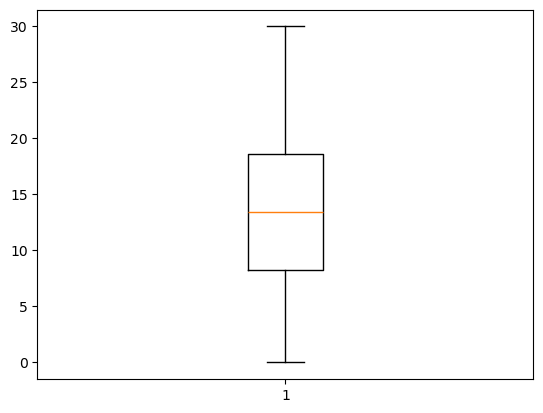

In [243]:
plt.boxplot(dataf['dti'])

In [245]:
def dti_buck(n):
    if n <= 9:
        return "Very Low"
    elif n > 9 and n < 11:
        return "Low"
    elif n> 11 and n <=14.5:
        return "Moderate"
    elif n>14.5 and n < 19:
        return "High"
    else:
        return "Very High"

dataf['Dti_buck'] = dataf["dti"].apply(dti_buck)


In [247]:
dataf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_y,issue_m,salary_buck,int_rate_buck,loan_bucket,Dti_buck
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,10,RENT,...,860xx,AZ,27.65,0.0,2011,12,40k and below,Low,5K and below,Very High
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,1,RENT,...,309xx,GA,1.00,0.0,2011,12,40k and below,Very High,5K and below,Very Low
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,10,RENT,...,606xx,IL,8.72,0.0,2011,12,40k and below,Very High,5K and below,Very Low
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,10,RENT,...,917xx,CA,20.00,0.0,2011,12,40k - 50k,Moderate,5 - 10K,Very High
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,3,RENT,...,852xx,AZ,11.20,0.0,2011,12,40k and below,Very Low,5K and below,Moderate


{'whiskers': [<matplotlib.lines.Line2D at 0x1b54e69ec60>,
 'caps': [<matplotlib.lines.Line2D at 0x1b54e69f170>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b54b55d340>],
 'medians': [<matplotlib.lines.Line2D at 0x1b54e69f650>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b54e69f8f0>],
 'means': []}

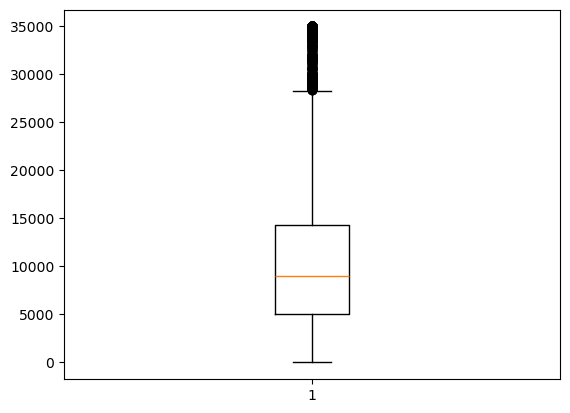

In [276]:
plt.boxplot(dataf['funded_amnt_inv'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b550263cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b54b1f0560>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b550263560>],
 'medians': [<matplotlib.lines.Line2D at 0x1b54b1f1190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b54b1f0ef0>],
 'means': []}

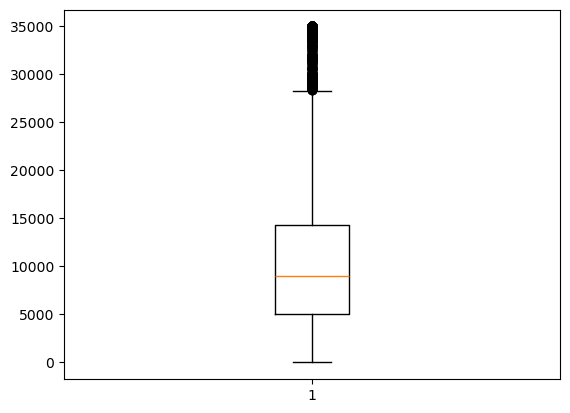

In [272]:
dataf.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_y', 'issue_m',
       'salary_buck', 'int_rate_buck', 'loan_bucket', 'Dti_buck'],
      dtype='object')

In [316]:
outlier_col = ['installment', 'annual_inc', 'int_rate', 'funded_amnt', 'funded_amnt_inv', 'loan_amnt']
print(outlier_col)

['installment', 'annual_inc', 'int_rate', 'funded_amnt', 'funded_amnt_inv', 'loan_amnt']


In [318]:
def remove_outlier(df, col, threshold):
    for i in col:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower_bond = q1 - (iqr * threshold)
        upper_bond = q3 + (iqr * threshold)
        df = df[(df[i] >= lower_bond) & (df[i] <= upper_bond)]  #filters the data and keeps the value thats between upper and lower bond removig all the outliers
    return df

dataf = remove_outlier(dataf,outlier_col,  1.5)
        
    

{'whiskers': [<matplotlib.lines.Line2D at 0x1b5526a4140>,
 'caps': [<matplotlib.lines.Line2D at 0x1b5526a4830>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5526a48f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b550808e60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b55080a960>],
 'means': []}

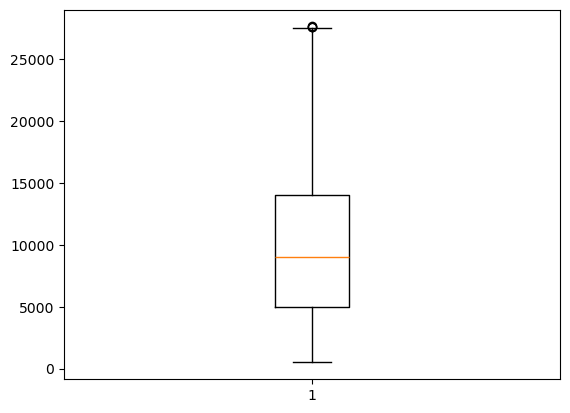

In [298]:
plt.boxplot(dataf["loan_amnt"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b550536780>,
 'caps': [<matplotlib.lines.Line2D at 0x1b550536d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5505364e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b550537200>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b5505374a0>],
 'means': []}

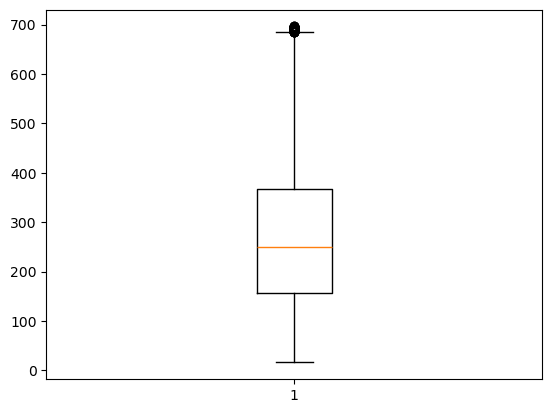

In [320]:
plt.boxplot(dataf['installment'])

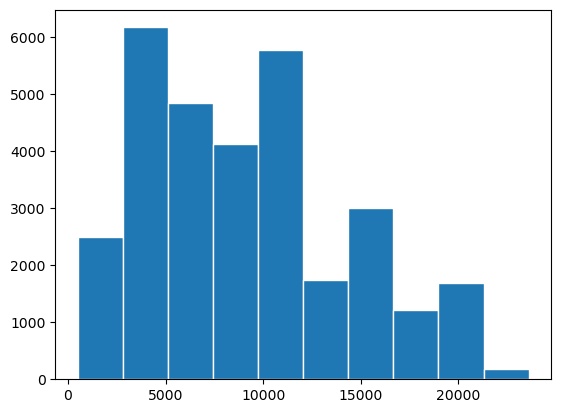

C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_4552\2972466522.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataf['loan_amnt'])


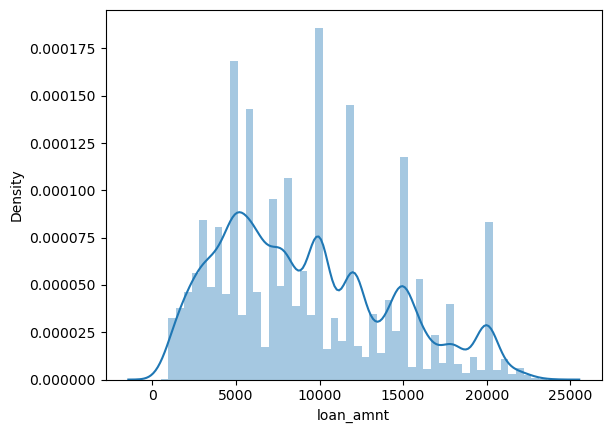

In [373]:
# below we can see maximum loan amount bought ranges from 5000 to 8000


plt.hist(dataf['loan_amnt'], edgecolor = 'white')
plt.show()

sns.distplot(dataf['loan_amnt'])
plt.show()


In [357]:
# describing the data

print(dataf['loan_amnt'].describe() )

print(" ######################################################################")

print(dataf['loan_amnt'].value_counts().sort_values(ascending=False))

count    31261.000000
mean      9182.368606
std       5112.213733
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12150.000000
max      23600.000000
Name: loan_amnt, dtype: float64
 ######################################################################
loan_amnt
10000    2500
12000    2026
5000     1851
6000     1733
15000    1591
         ... 
16725       1
9625        1
19900       1
19875       1
700         1
Name: count, Length: 708, dtype: int64


C:\Users\Reetesh V\AppData\Local\Temp\ipykernel_4552\2265437365.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataf['annual_inc'])


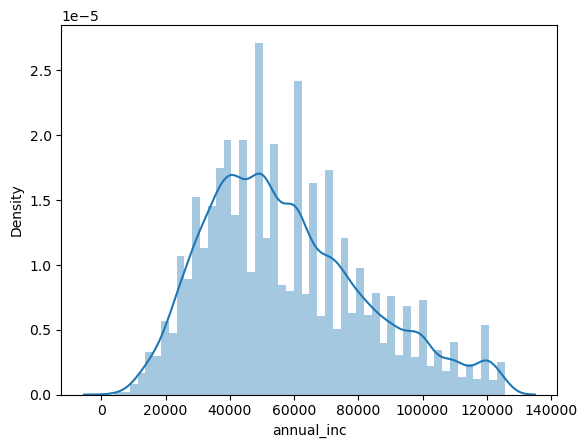

In [380]:
# Annual income

# most of the people have the salary ranges from 40k - 50k

sns.distplot(dataf['annual_inc'])
plt.show()

In [378]:
dataf['annual_inc'].describe()

count     31261.000000
mean      57620.349278
std       24858.138714
min        4000.000000
25%       39000.000000
50%       54000.000000
75%       73000.000000
max      125555.000000
Name: annual_inc, dtype: float64

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

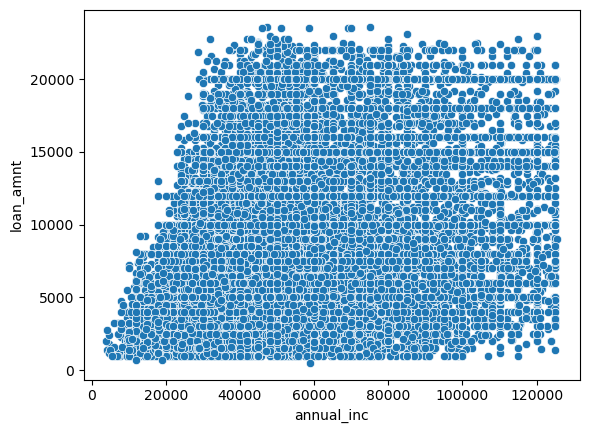

In [388]:
# from the below graph we can see as the salary increases the loan amount also gets increased

sns.scatterplot(x = dataf['annual_inc'],  y =dataf['loan_amnt'])

<Axes: xlabel='salary_buck', ylabel='loan_amnt'>

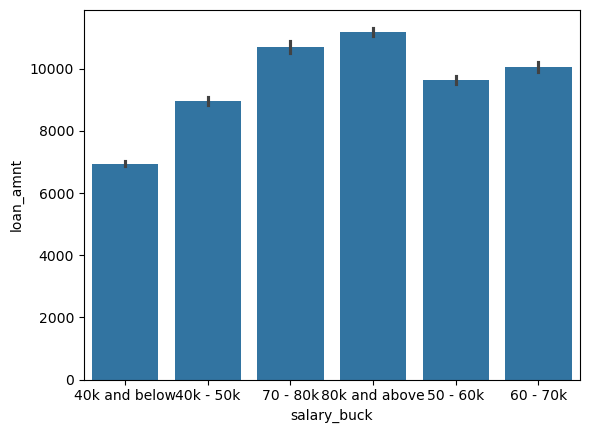

In [411]:
# from the below barplot we can see the people whose salary was ranging more than 80k was opting for more loan amount


sns.barplot(x =  dataf['salary_buck'], y = dataf['loan_amnt'])

<Axes: xlabel='home_ownership'>

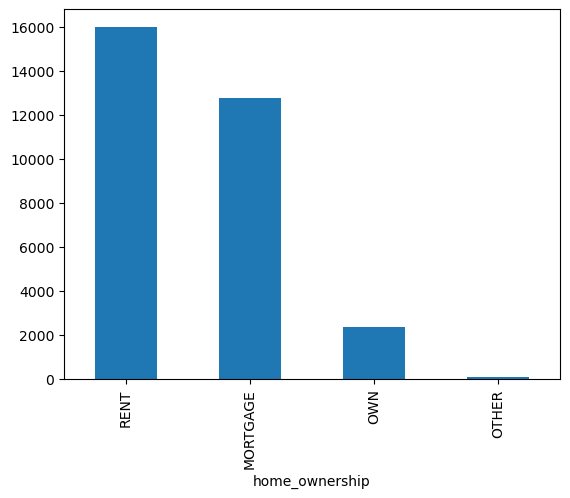

In [437]:
# Analysing the categorical column

# from the below plot we can say that the people who are staying in the rental house are having more number of loans

dataf['home_ownership'].value_counts().plot.bar()

<Axes: xlabel='purpose'>

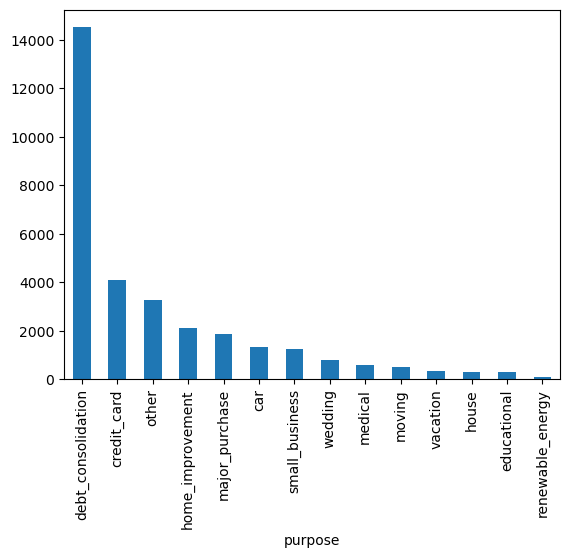

In [455]:
# from the below graph we can see that majority of the people purchased the loan because of debit_consolidation 

dataf.purpose.value_counts().plot.bar()

<Axes: xlabel='addr_state'>

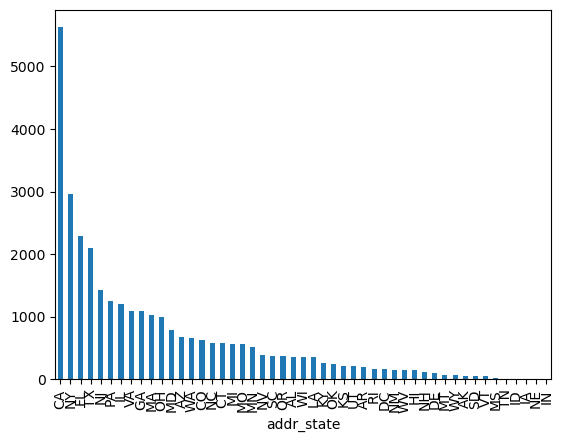

In [468]:
# in the below graph we can observe that majority of the people who applied for the loan is from CA state

dataf.addr_state.value_counts().plot.bar()

<Axes: ylabel='count'>

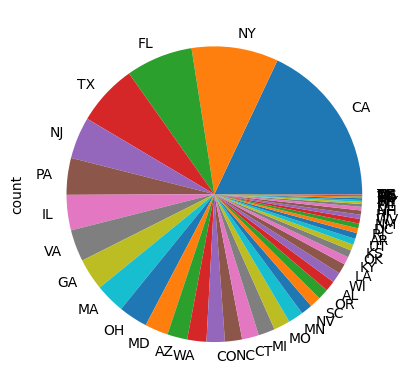

In [470]:
dataf.addr_state.value_counts().plot.pie()

<Axes: xlabel='emp_length'>

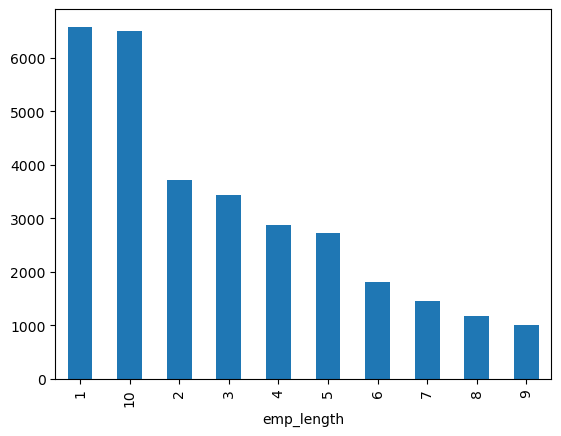

In [490]:
# from the below graph we can see that majority of people whose employee length is either 10 or 1 year has more number of loan

dataf.emp_length.value_counts().plot.bar()



In [543]:
# Bivariate analysis

# Comparing Annual income with loan status

inc_vs_ln_sts = dataf.groupby(['salary_buck', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_vs_ln_sts['total'] = inc_vs_ln_sts["Charged Off"] + inc_vs_ln_sts["Fully Paid"]
inc_vs_ln_sts["charged_off_per"]  = round((inc_vs_ln_sts["Charged Off"] / inc_vs_ln_sts['total'])*100, 2)
inc_vs_ln_sts.sort_values("charged_off_per", ascending=False)

loan_status,salary_buck,Charged Off,Fully Paid,total,charged_off_per
1,40k and below,1558,7310,8868,17.57
2,50 - 60k,734,4297,5031,14.59
0,40k - 50k,763,4517,5280,14.45
3,60 - 70k,435,3110,3545,12.27
4,70 - 80k,347,2591,2938,11.81
5,80k and above,507,5092,5599,9.06


<Axes: xlabel='salary_buck', ylabel='charged_off_per'>

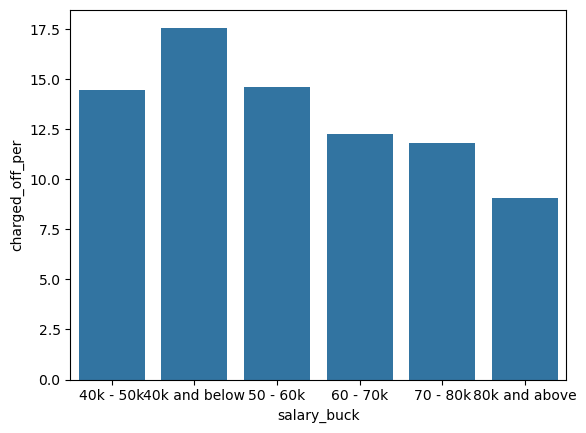

In [545]:
# From the below plot we can see that the people whose salary is less than 40k has more chances of getting defaulted and the people whose salary is 
# more than 80k and above has less chances of getting defaulted or getting charged off

sns.barplot(x=inc_vs_ln_sts['salary_buck'], y = inc_vs_ln_sts['charged_off_per'])

In [573]:
# Comparing interst rate with charged off ratio

int_rate_vs_ln_sts = dataf.groupby([ 'int_rate_buck', 'loan_status' ]).loan_status.count().unstack().fillna(0).reset_index()
int_rate_vs_ln_sts['Total'] = int_rate_vs_ln_sts['Charged Off'] + int_rate_vs_ln_sts['Fully Paid']
int_rate_vs_ln_sts['Charged_off_per'] = round((int_rate_vs_ln_sts['Charged Off'] / int_rate_vs_ln_sts['Total'] *100), 2)
int_rate_vs_ln_sts.sort_values('Charged_off_per', ascending= False)

loan_status,int_rate_buck,Charged Off,Fully Paid,Total,Charged_off_per
3,Very High,1456,4191,5647,25.78
0,High,619,2924,3543,17.47
2,Moderate,698,3973,4671,14.94
1,Low,1065,7814,8879,11.99
4,Very Low,506,8015,8521,5.94


<Axes: xlabel='int_rate_buck', ylabel='Charged_off_per'>

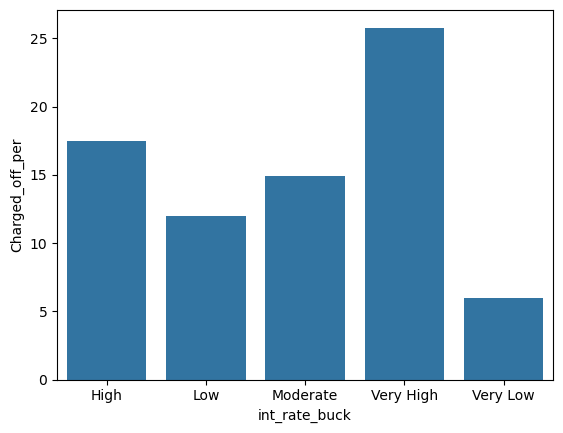

In [585]:
# From the below analysis we can see that the people who has more intrest rate has more chances of getting charged off compared to others 

sns.barplot(x = int_rate_vs_ln_sts['int_rate_buck'], y = int_rate_vs_ln_sts['Charged_off_per'])

In [587]:
dataf.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_y', 'issue_m',
       'salary_buck', 'int_rate_buck', 'loan_bucket', 'Dti_buck'],
      dtype='object')

In [601]:
# analysing home_ownership with loan status 

hme_own_ln_sts = dataf.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
hme_own_ln_sts['Total'] = hme_own_ln_sts['Charged Off'] + hme_own_ln_sts['Fully Paid']
hme_own_ln_sts['charge_off_per'] = round((hme_own_ln_sts['Charged Off'] / hme_own_ln_sts['Total']*100), 2) 
hme_own_ln_sts.sort_values('charge_off_per', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,charge_off_per
1,OTHER,16,72,88,18.18
3,RENT,2353,13662,16015,14.69
2,OWN,334,2033,2367,14.11
0,MORTGAGE,1641,11150,12791,12.83


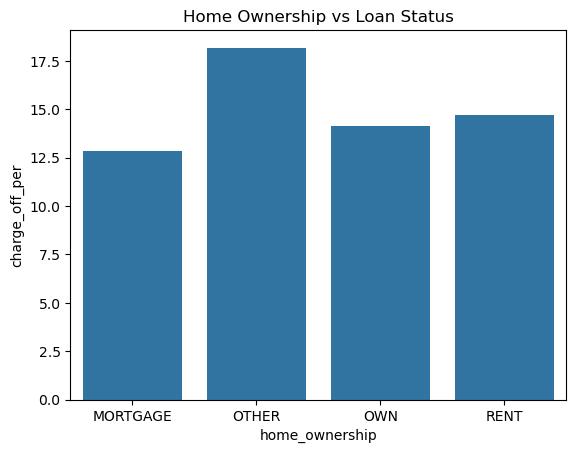

In [690]:

sns.barplot(x = hme_own_ln_sts['home_ownership'], y = hme_own_ln_sts['charge_off_per'] )
plt.title("Home Ownership vs Loan Status")
plt.show()

In [626]:
# analysing between purpose and charged off

pur_vs_ln_sts = dataf.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pur_vs_ln_sts['Total'] = pur_vs_ln_sts['Charged Off'] + pur_vs_ln_sts['Fully Paid']
pur_vs_ln_sts['Charge_off_per'] = round((pur_vs_ln_sts['Charged Off'] / pur_vs_ln_sts['Total'] *100), 2)
pur_vs_ln_sts.sort_values('Charge_off_per', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Charge_off_per
11,small_business,325,913,1238,26.25
10,renewable_energy,15,65,80,18.75
5,house,46,233,279,16.49
3,educational,45,234,279,16.13
7,medical,91,485,576,15.80
9,other,508,2751,3259,15.59
8,moving,74,412,486,15.23
12,vacation,48,275,323,14.86
2,debt_consolidation,2119,12400,14519,14.59
4,home_improvement,247,1877,2124,11.63


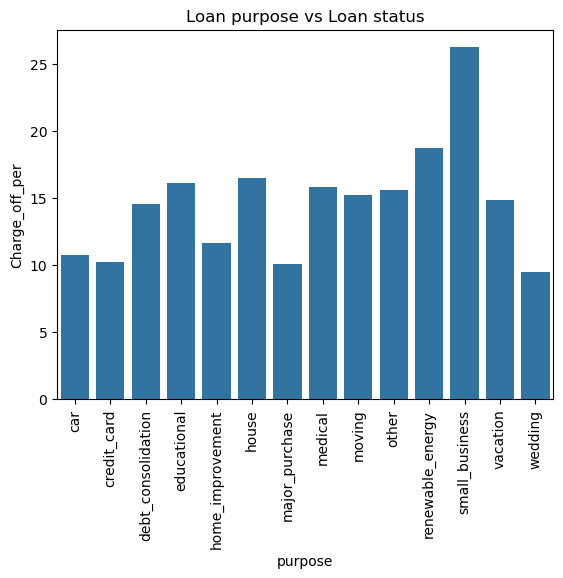

In [688]:
# From the below graph we can see that the people who had took the loan for small busniess is more likely to get charged off

sns.barplot(x=pur_vs_ln_sts['purpose'], y= pur_vs_ln_sts['Charge_off_per'] )
plt.xticks(rotation=90)
plt.title("Loan purpose vs Loan status")
plt.show()

In [646]:
# dataf.columns
#  Now comparing the DTI (debit to income ratio) and Loan status 

dti_vs_ln_sts = dataf.groupby(['Dti_buck', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_ln_sts['total'] = dti_vs_ln_sts['Charged Off'] + dti_vs_ln_sts['Fully Paid']
dti_vs_ln_sts['charged_off_per'] = round((dti_vs_ln_sts['Charged Off']/dti_vs_ln_sts['total'] * 100),2)
dti_vs_ln_sts.sort_values("charged_off_per", ascending=False)


loan_status,Dti_buck,Charged Off,Fully Paid,total,charged_off_per
3,Very High,1194,6309,7503,15.91
0,High,966,5663,6629,14.57
2,Moderate,771,4760,5531,13.94
1,Low,366,2493,2859,12.80
4,Very Low,1047,7692,8739,11.98


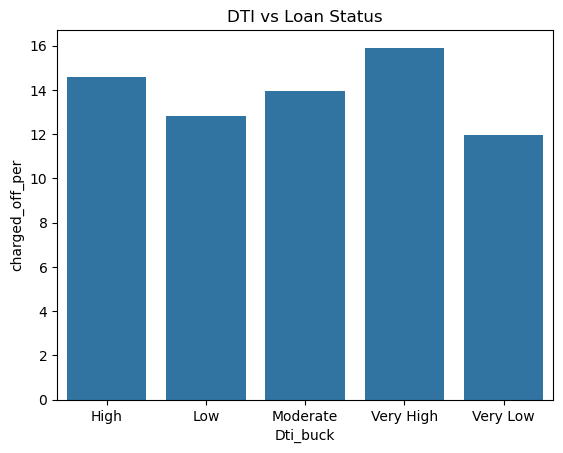

In [686]:
# people who has a very high DTI are morelikely to get charged off

sns.barplot(x = dti_vs_ln_sts['Dti_buck'],y=dti_vs_ln_sts['charged_off_per'] )
plt.title("DTI vs Loan Status")
plt.show()

In [678]:
# Now analysing bank rupticies vs loan status
bnk_rup_vs_ln_sts = dataf.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bnk_rup_vs_ln_sts['Total'] = bnk_rup_vs_ln_sts['Charged Off'] + bnk_rup_vs_ln_sts['Fully Paid']
bnk_rup_vs_ln_sts['charged_off_per'] = round((bnk_rup_vs_ln_sts['Charged Off'] / bnk_rup_vs_ln_sts['Total'] * 100),2)

bnk_rup_vs_ln_sts.sort_values('charged_off_per', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,charged_off_per
2,2.0,2,3,5,40.00
1,1.0,294,1090,1384,21.24
0,0.0,4048,25824,29872,13.55


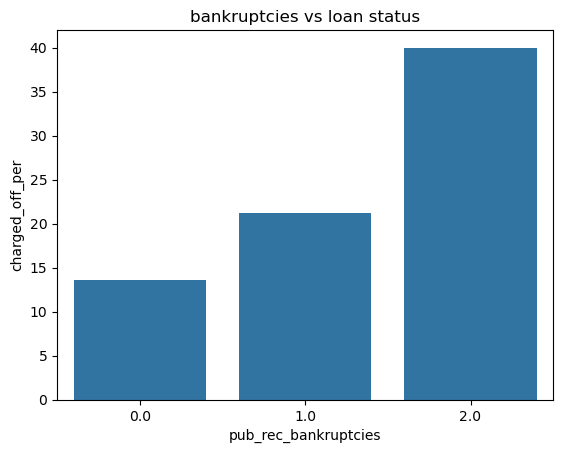

In [684]:
# From the below graph we can see that the people having 2 bankruptcies are more likely to get charged off

sns.barplot(x=bnk_rup_vs_ln_sts['pub_rec_bankruptcies'], y = bnk_rup_vs_ln_sts['charged_off_per'])
plt.title('bankruptcies vs loan status')
plt.show()


In [700]:
# Checking which issue year had more number of charged off

is_year_vs_ln_sts = dataf.groupby(['issue_y','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
is_year_vs_ln_sts['Total'] = is_year_vs_ln_sts['Charged Off'] + is_year_vs_ln_sts['Fully Paid']
is_year_vs_ln_sts['charged_off_per'] = round((is_year_vs_ln_sts['Charged Off'] / is_year_vs_ln_sts['Total'] * 100),2)

is_year_vs_ln_sts.sort_values('charged_off_per', ascending=False)

loan_status,issue_y,Charged Off,Fully Paid,Total,charged_off_per
0,2007,2,5,7,28.57
1,2008,153,852,1005,15.22
4,2011,2464,13929,16393,15.03
3,2010,1208,8458,9666,12.50
2,2009,517,3673,4190,12.34


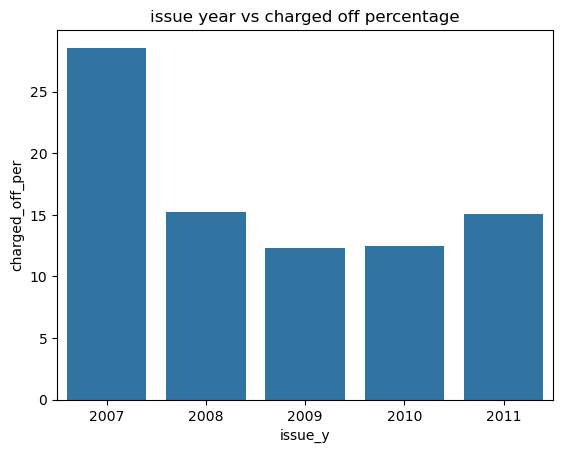

In [714]:
# from the below graph we can see the people who took the loan in 2007 has more charged off percentage

sns.barplot(x = is_year_vs_ln_sts['issue_y'], y= is_year_vs_ln_sts['charged_off_per'])
plt.title('issue year vs charged off percentage')
plt.show()

In [718]:
# Checking which issue month had more number of charged off

is_mnth_vs_ln_sts = dataf.groupby(['issue_m','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
is_mnth_vs_ln_sts['Total'] = is_mnth_vs_ln_sts['Charged Off'] + is_mnth_vs_ln_sts['Fully Paid']
is_mnth_vs_ln_sts['charged_off_per'] = round((is_mnth_vs_ln_sts['Charged Off'] / is_mnth_vs_ln_sts['Total'] * 100),2)

is_mnth_vs_ln_sts.sort_values('charged_off_per', ascending=False)

loan_status,issue_m,Charged Off,Fully Paid,Total,charged_off_per
8,9,441,2369,2810,15.69
4,5,372,2055,2427,15.33
11,12,513,2840,3353,15.30
5,6,380,2242,2622,14.49
9,10,428,2550,2978,14.37
10,11,448,2799,3247,13.80
7,8,381,2391,2772,13.74
6,7,380,2408,2788,13.63
0,1,240,1638,1878,12.78
3,4,292,2091,2383,12.25


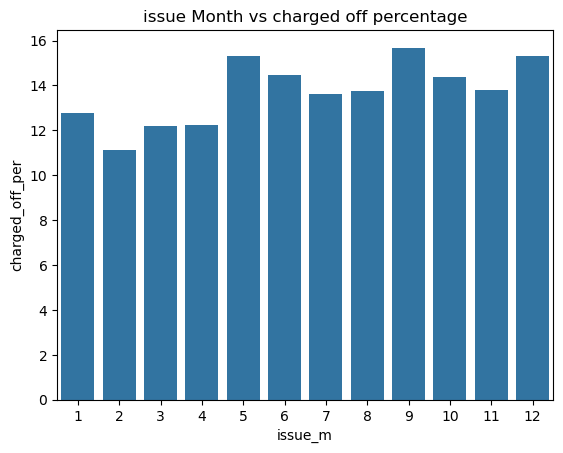

In [724]:
# from the below graph we can see the people who took the loan in september has more charged off percentage

sns.barplot(x = is_mnth_vs_ln_sts['issue_m'], y= is_mnth_vs_ln_sts['charged_off_per'])
plt.title('issue Month vs charged off percentage')
plt.show()

In [730]:
# Checking which state had more number of charged off

state_vs_ln_sts = dataf.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_ln_sts['Total'] = state_vs_ln_sts['Charged Off'] + state_vs_ln_sts['Fully Paid']
state_vs_ln_sts['charged_off_per'] = round((state_vs_ln_sts['Charged Off'] / state_vs_ln_sts['Total'] * 100),2)

state_vs_ln_sts.sort_values('charged_off_per', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,charged_off_per
40,TN,2.0,6.0,8.0,25.00
31,NV,81.0,307.0,388.0,20.88
39,SD,11.0,46.0,57.0,19.30
11,HI,27.0,117.0,144.0,18.75
30,NM,27.0,128.0,155.0,17.42
9,FL,383.0,1906.0,2289.0,16.73
23,MO,92.0,469.0,561.0,16.40
35,OR,60.0,307.0,367.0,16.35
10,GA,174.0,911.0,1085.0,16.04
0,AK,9.0,49.0,58.0,15.52


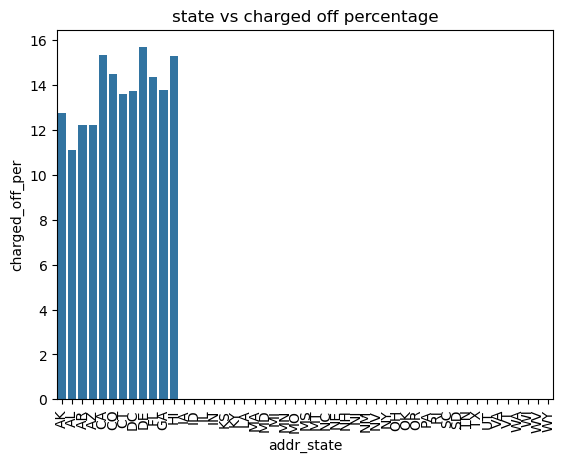

In [734]:
# State address TN has more number of charged off loans

sns.barplot(x = state_vs_ln_sts['addr_state'], y= is_mnth_vs_ln_sts['charged_off_per'])
plt.title('state vs charged off percentage')
plt.xticks(rotation=90)
plt.show()

In [742]:
# analysing loan grade with loan status

ln_grd_vs_ln_sts = dataf.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
ln_grd_vs_ln_sts['Total'] = ln_grd_vs_ln_sts['Charged Off'] + ln_grd_vs_ln_sts['Fully Paid']
ln_grd_vs_ln_sts['charged_off_per'] = round((ln_grd_vs_ln_sts['Charged Off'] / ln_grd_vs_ln_sts['Total'] * 100),2)

ln_grd_vs_ln_sts.sort_values('charged_off_per', ascending=False)


loan_status,grade,Charged Off,Fully Paid,Total,charged_off_per
6,G,35,62,97,36.08
5,F,165,381,546,30.22
4,E,481,1293,1774,27.11
3,D,873,3108,3981,21.93
2,C,1102,5370,6472,17.03
1,B,1161,8454,9615,12.07
0,A,527,8249,8776,6.01


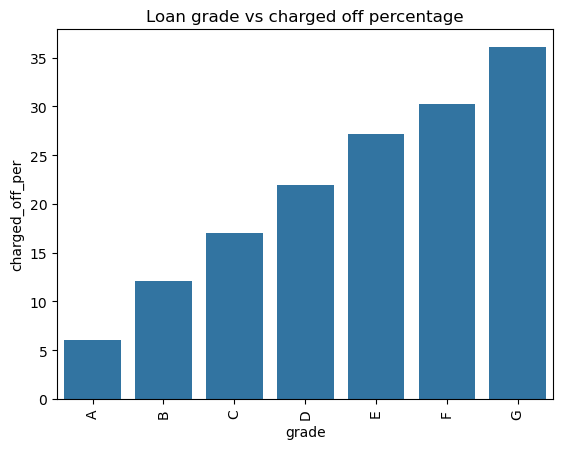

In [800]:
# G grade loan has more number of charged off loans

sns.barplot(x = ln_grd_vs_ln_sts['grade'], y= ln_grd_vs_ln_sts['charged_off_per'])
plt.title('Loan grade vs charged off percentage')
plt.xticks(rotation=90)
plt.show()

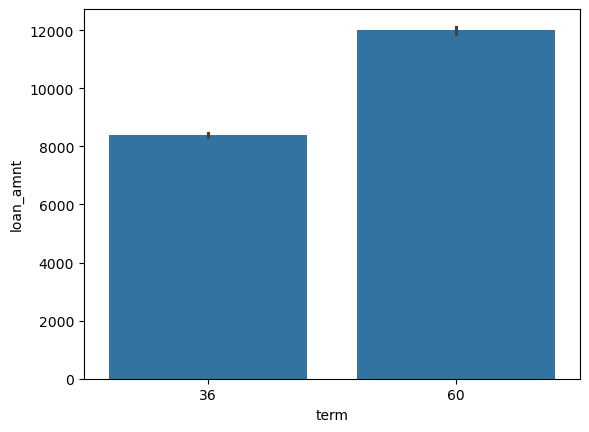

In [829]:
# Term vs loan_amount
# From the below graph we can see that the term increases as the loan amount increases
sns.barplot(x=dataf['term'], y= dataf['loan_amnt'])
plt.show()

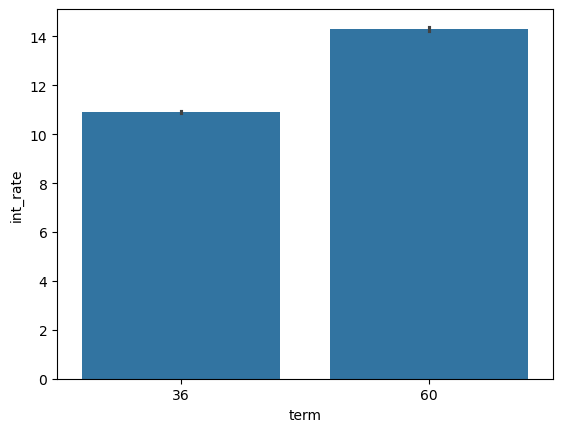

In [831]:
# Term vs intrest rate
# The intrest rate increases as the term increases

sns.barplot(x = dataf['term'], y=dataf['int_rate'])
plt.show()



In [ ]:
corr_data = dataf

In [764]:
corr_data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
emp_length                       int32
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
issue_y                          int32
issue_m                          int32
salary_buck                     object
int_rate_buck                   object
loan_bucket                     object
Dti_buck                        object
dtype: object

In [790]:
corr_data.drop(['Dti_buck', 'loan_bucket','int_rate_buck','salary_buck','addr_state', 'zip_code', 'purpose', 'loan_status', 'verification_status', 'home_ownership'
               ,'grade', 'id', 'issue_m', 'issue_y', 'issue_d', 'installment'], axis=1, inplace=True)

KeyError: "['Dti_buck', 'loan_bucket', 'int_rate_buck', 'salary_buck', 'addr_state', 'zip_code', 'purpose', 'loan_status', 'verification_status', 'home_ownership', 'grade', 'id', 'issue_m', 'issue_y', 'issue_d', 'installment'] not found in axis"

0        36
1        60
2        36
3        36
5        36
         ..
39562    36
39573    36
39623    36
39666    36
39680    36
Name: term, Length: 31261, dtype: int64

In [785]:
corr_data.drop(['issue_d'], axis=1, inplace=True)

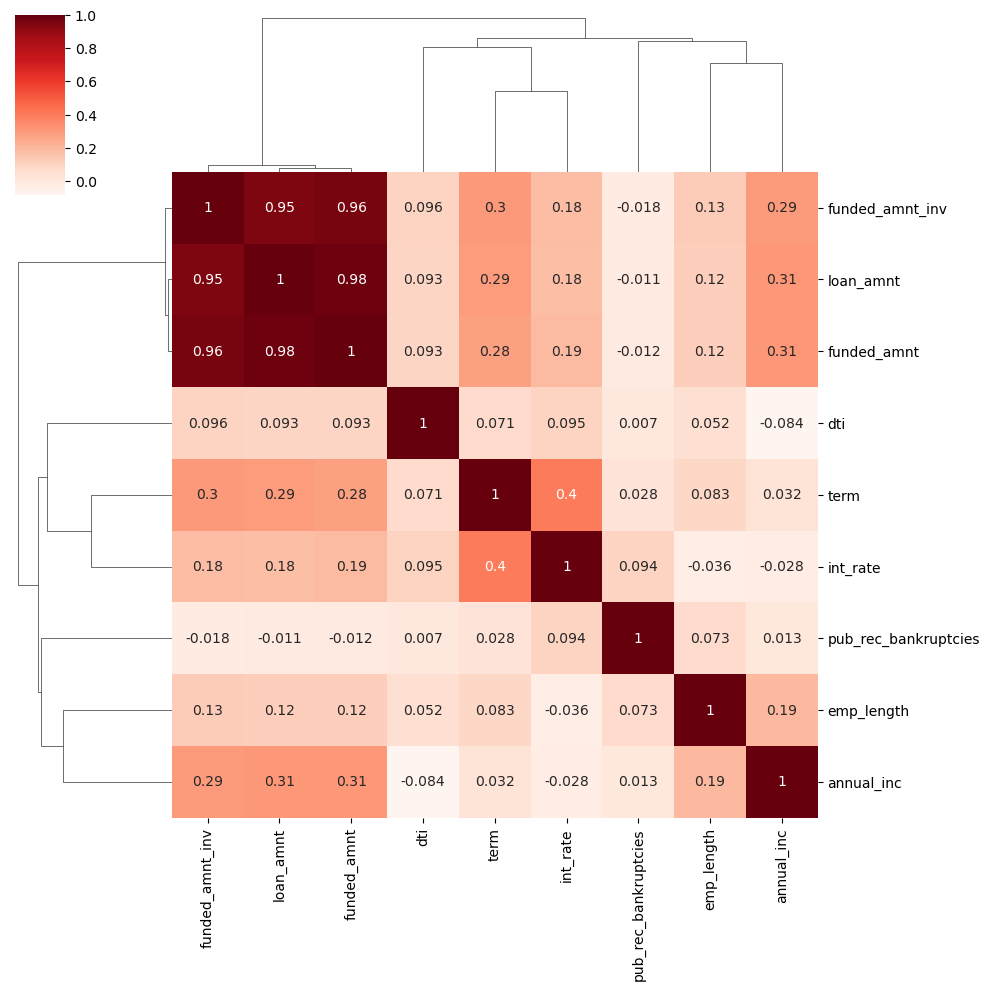

In [796]:
# Finding the correleation of the loan data

corr  = corr_data.corr()
sns.clustermap(corr, annot=True, cmap='Reds')
plt.show()

# From the above cluster map we can conclude
## Positive correleation

#### Term has postive correleation with intrest rate
#### fundex amount inv has strong correleation with loan amount
#### Loan amount has strong correleation with funded amount

## Negative Correleation

#### Bank ruptcies has weak correleation with funded amount inv, loan amount and funded amount
#### intrest rate has a weak correleation with annual income
#### ḌTI has weak correleation with annual income
#### Employee length has weak correleation with intrest rate

